$\newcommand{\myvector}[2]{\left\{ \begin{array}{c}#1\\#2\end{array} \right\}}$
$\newcommand{\sM}[1]{s_{\mathrm{M#1}}}$
$\newcommand{\xM}[1]{x_{\mathrm{M#1}}}$
$\newcommand{\xpM}[1]{x'_{\mathrm{M#1}}}$

# APPENDIX B:  Rudimentary Bayesian inverse kinematics


This Appendix describes a rudimentary Bayesian inverse kinematics (BIK) model to introduce the computational details of the main manuscript's BIK model.

Consider the slider mechanism pictured below.  This mechanism consists of a single rigid slider which moves to a global position $x$, and to which two markers ("M1" and "M2") are rigidly fixed.  For simplicity let's assume that we know the local marker positions: $\sM{1}$ = 35 mm and $\sM{2}$ = 45 mm.

<img src="figs/slider.png" width="500">

Let's also assume that we have measured the global marker positions, which we shall denote $\xpM{1}$ and $\xpM{2}$, but they are imperfect measurements, with values of 46.0 and 55.0 mm, respectively. The IK problem is to find the slider position $x$ given the marker measurements $\xpM{1}$ and $\xpM{2}$.

### Approach 1: Least-squares

One way to solve this IK problem is to use a least-squares approach, and in particular one which minimizes  measurement error. The first step is to express the true global marker positions in terms of our unknown variable $x$ as follows:

\begin{align}
\xM{1} &= x + 35\\
\xM{2} &= x + 45\\
\end{align}

The sum of the the squared measurement errors is:

\begin{equation}
f(x) = (\xM{1} - 46)^2 + (\xM{2} - 55)^2
\end{equation}

which reduces as follows:

\begin{align}
f(x) &= (x - 11)^2 + (x - 10)^2 \\
       &= (x^2 -22x + 121) + (x^2 - 20x + 100)\\
       &= 2x^2 -42x + 221
\end{align}

The minimum value of this function is given when the derivative is zero:

\begin{align}
\frac{d}{dx}f(x) = 4x - 42 = 0
\end{align}

so our least-squares estimate is: $x$ = 42/4 = 10.5 mm, and the (minimized) measurement error is 0.5 mm for each marker.

### Approach 2:  Bayesian

In contrast to the least-squares approach, which minimizes measurement error, **the Bayesian approach maximizes model parameters' mean posterior probabilities** given observed (noisy) data. A roughly equivalent interpretation is that the Bayesian approach maximize the probability of observing the given data. This is done by optimizing the parameters which characterize a stochastic system.

To implement Bayesian IK we start with the stochastic, graphical model of our measurements depicted below.


<img src="figs/bayesmodel_simple.png" width="300">


In this model there are two stochastic variables: $x$ and $\epsilon$, where $x$ is the slider displacement we wish to estimate, and where $\boldsymbol{\epsilon}$ is measurement error. Once the numerical value of $x$ is known, then the true values of the deterministic variables ($\xM{1}$ and $\xM{2}$) are also known. Similarly, once the random measurement error values $\boldsymbol{\epsilon}$ are known, then the values of the (modeled) observed variables $\boldsymbol{q}$ are known. Here $\boldsymbol{q}$ is a generalized observation vector containing the values of all observed variables, in this case: $\xpM{1}$ and $\xpM{2}$.

Let's start implementing this model in Python by defining known values:  the true local positions and the observed measurment values.

In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot

### local positions:
sM1 = 35.0
sM2 = 45.0
### measurements:
xpM1 = 46.0
xpM2 = 55.0

Let's next set the value $x$ = 8 mm, and let's assume that our measurement error $\boldsymbol{\epsilon}$ is Gaussian with a standard deviation of 0.5 mm. Based on these values let's simulate some random observations $\boldsymbol{q}$.

In [2]:
import random

noise_sd = 0.5  #mm

#define measurement model:
def random_measurement(x):
    xM1 = x + sM1 + random.gauss(0, noise_sd)
    xM2 = x + sM2 + random.gauss(0, noise_sd)
    return [xM1, xM2]

#generate random data (20 observations):
random.seed(0)
x = 8.0
X = np.array([random_measurement(x)  for i in range(20)])
print( X )

[[ 43.4708577   52.30171095]
 [ 42.66014278  53.18525178]
 [ 42.49182555  52.96393999]
 [ 43.08959824  52.58445039]
 [ 42.34548132  53.09694387]
 [ 43.49662485  52.67650918]
 [ 42.83316601  53.82283588]
 [ 42.72055512  52.74292167]
 [ 44.20205967  52.2344587 ]
 [ 43.39823292  51.99817574]
 [ 42.70151863  53.75184044]
 [ 43.61071821  52.54943992]
 [ 42.77315063  53.04011652]
 [ 42.37094835  53.27611   ]
 [ 44.11378865  52.32237925]
 [ 42.00923346  53.14412187]
 [ 42.94043834  53.90216497]
 [ 42.91981891  52.97467014]
 [ 42.90456306  52.50469688]
 [ 43.33651499  52.33795877]]


This represents 20 different sets of measurements we could expect if our model is accurate. The results can be visualized as follows:

<IPython.core.display.Javascript object>


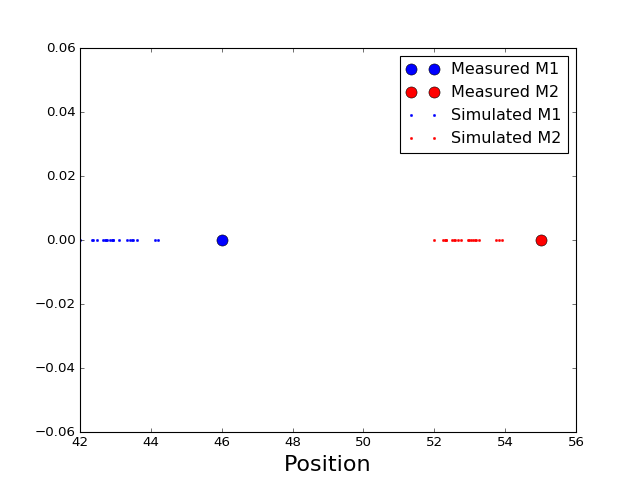

In [3]:
def myplot(X):
    ax = pyplot.axes()
    ax.plot(xpM1, 0, 'bo', markersize=10, label='Measured M1')
    ax.plot(xpM2, 0, 'ro', markersize=10, label='Measured M2')
    ax.plot(X[:,0], [0]*X.shape[0], 'b.', markersize=4, label='Simulated M1')
    ax.plot(X[:,1], [0]*X.shape[0], 'r.', markersize=4, label='Simulated M2')
    ax.legend()
    ax.set_xlabel('Position', size=20)
    
pyplot.figure()
myplot(X)

For the current position ($x$=8) and assumed measurement error ($\epsilon$=0.5) the simulated data do not overlap with the measured data, so the probability of observing the measured data is small. Let's change $x$ to 10 and try again.

<IPython.core.display.Javascript object>


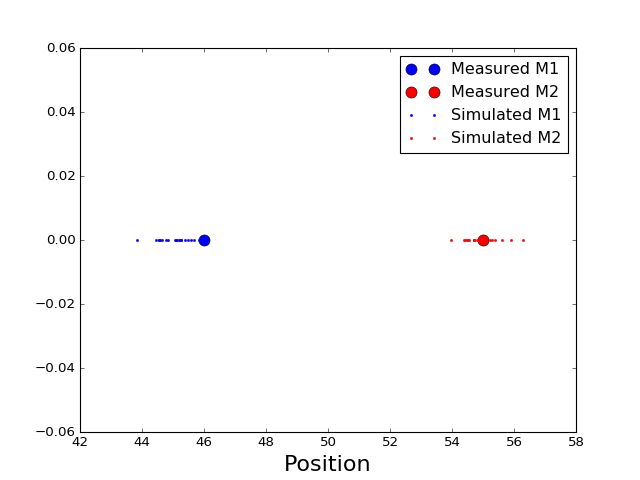

In [4]:
X = np.array([random_measurement(10)  for i in range(20)])
pyplot.figure()
myplot(X)

There is now much greater overlap between the simulated and measured data, implying that there is a much greater probability of observing these data when $x$=10 than when $x$=8.

Above we suggested that an easy way to understand Bayesian computation is: maximizing the probability of observing the data.  This probability can be expressed as: P( data | parameters );  the probability of observing the data given particular model parameters.  In reality Bayesian computation aims to maximize the complementary probability: P( parameters | data ), and the goal is to maximize the maximum value of the distribution for each parameter. Bayes' Rule provides a computationally simple mapping between P( data | parameters ) and its compliment: P( parameters | data ), where the mapping depends only on the assumed (or calculated) prior distribution(s) (see Appendix A).

The computational details associated with this posterior distribution maximization are somewhat complex and difficult to demonstrate in just a few lines of code.  We shall instead turn to PyMC, where all probability computations occur under the surface.

First let's translate our measurement model into PyMC.

In [5]:
import pymc

tau = 1 / 0.5**2    #measurement precision ( 1 / SD^2 )
x   = pymc.Uniform("x", -20, 20)  #prior distribution for x

@pymc.deterministic
def observations_model(x=x):
    xM1 = x + sM1  #global position of Marker 1
    xM2 = x + sM2  #global position of Marker 2
    return [xM1, xM2]
q = pymc.Normal("q", observations_model, tau)

In the code snippet above a variable "`tau`" is created to specify our assumed measurement precision, where precision ($\tau$) is defined as the inverse of variance ($\sigma^2$):

\begin{equation}
\tau = \dfrac{1}{\sigma^2}
\end{equation}

Since we have assumed a standard deviation of 0.5 mm, our assumed precision is: $\tau$=4. 

Next we specify a prior distribution for the slider position $x$. The prior distribution used above is uniform between $x=-20$ and $x=+20$, implying that the slider can be anywhere in that range with equal probability. Note that the variable "`x`" is a stochastic PyMC variable.  This means that we can generate random values for this variable based on its current distribution as follows:

In [6]:
print( x.random() )
print( x.random() )
print( x.random() )
print( x.random() )
print( x.random() )

0.648691978361
3.4473561752
-5.09408135298
-0.957488682927
-18.4437817645


You can see that these random values span the range [-20, 20]. Every time we call `random()`, PyMC changes `x`'s  "`value`" attribute as follows.

In [7]:
print( x.value )  #the final value from above
print( x.value )  #the value hasn't changed yet
x.random()
print( x.value )  #now it has

-18.4437817645
-18.4437817645
16.0067160642


Next we create a model of our observations $\boldsymbol{q}$. First we create a function called `observations_model` which computes the expected marker positions based on the value of `x` and returns both values.  Next we tell PyMC that the result of `observations_model` should be regarded as stochastic, with a normal (Gaussian) distribution that has a mean of the true marker positions (given `x`) and a precision of `tau`.  The "`@pymc.deterministic`" statement is a function decorator which alerts PyMC to regard this function as a deterministic variable, and to use `x`'s value inside that function. Just like `x`, `q` is now a PyMC stochastic variable and we can generate random `q` values as follows.


In [8]:
x.set_value(0)      #set the slider position
print( q.random() ) #random marker positions given x=0
print( q.random() ) 
print( q.random() ) 
print( q.random() ) 
print( q.random() ) 

[ 34.72639925  46.49660635]
[ 35.96822003  46.32326479]
[ 34.53206689  44.39990657]
[ 35.04928577  45.51594475]
[ 34.88440876  44.8827851 ]


If we instead choose the least-squares solution $x=10.5$ we can generate random data which looks much more like our observed values of:  $\xpM{1}=46$ and $\xpM{2}=55$. 

In [9]:
x.set_value(10.5)
print( q.random() )
print( q.random() ) 
print( q.random() ) 
print( q.random() ) 
print( q.random() ) 

[ 45.82809469  55.65836003]
[ 45.90318491  54.85878382]
[ 45.46831837  54.98083118]
[ 45.95022993  54.86778597]
[ 45.31396593  56.04313928]


Instead of directly altering $x$ in this manner, and then finding its optimal value in a numerical optimization sense, PyMC instead uses the observed data to alter $x$'s current distribution, and then examine $x$'s and $q$'s posterior distributions in attempts to maximize their maxima.  In other words, rather than searching for a singla optimium value for $x$, PyMC recognizes that both $x$ and $q$ are probabilistic, so attempts to mutually maximize their posterior probabilities, given the observed data.  In order to achieve that we first have to tell PyMC what our observations were. This can be done by slightly altering or $q$ variable as follows:

In [10]:
qobs = pymc.Normal("qobs", observations_model, tau, value=[46,55], observed=True)

Next, maximizing the posterior distributions can be achieved with a Markov Chain Monte Carlo (MCMC) simulation:

In [11]:
mcmc = pymc.MCMC([qobs, x])
mcmc.sample(40000, 20000)

 [-----------------100%-----------------] 40000 of 40000 complete in 3.0 sec

The first line initializes a model for MCMC simulation using all stochastic variables. The second line iteratively samples from their posterior distributions, discarding the first 20,000 iterations, and retaining the final 20,000 iterations for the final posterior distributions.  Let's examine our posterior distribution for $x$.

<IPython.core.display.Javascript object>


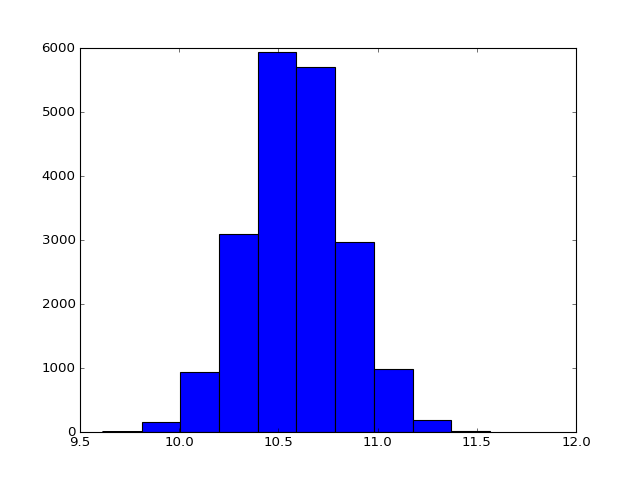

In [12]:
X = mcmc.trace('x')[:]
pyplot.figure()
pyplot.hist(X);

This posterior distribution spans the least-squares solution ($x$=10.5), and the maximum a posteriori likelihood (MAP) is very close to the least-square solution:

In [13]:
print( X.mean() )  #MAP

10.5891135324


However, as depcited in the posterior distribution above there is also a fair bit of uncertainty in our estimate for $x$. Surely values of $x$=10 or $x$=11.0 aren't the best choices, but this result suggests that they are still plausible, based on our modeling assumptions.  So let's change the assumptions and examine the effects. Let's first try increasing the presumed measurement precision (from SD=0.5 mm to SD=0.1 mm).

 [-----------------100%-----------------] 40000 of 40000 complete in 2.5 sec

<IPython.core.display.Javascript object>


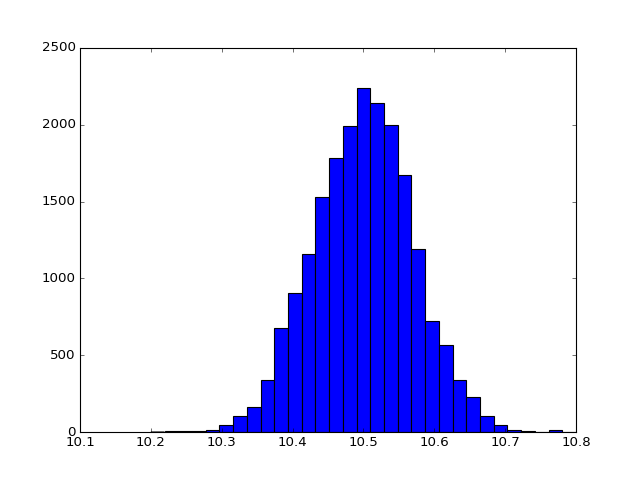

In [14]:
tau  = 1 / 0.1**2    #measurement precision ( 1 / SD^2 )
x    = pymc.Uniform("x", -20, 20)  #prior distribution for x
@pymc.deterministic
def observations_model(x=x):
    xM1 = x + sM1  #global position of Marker 1
    xM2 = x + sM2  #global position of Marker 2
    return [xM1, xM2]
qobs = pymc.Normal("qobs", observations_model, tau, value=[46,55], observed=True)

mcmc = pymc.MCMC([qobs, x])
mcmc.sample(40000, 20000)

pyplot.figure()
X = mcmc.trace('x')[:]
pyplot.hist(X, range=(10.2,10.8), bins=31);

Greater assumed measurement precision has narrowed the posterior. Let's next try a presumption of extremely precise measurements (SD=0.01 mm).

 [-----------------100%-----------------] 40000 of 40000 complete in 2.6 sec

<IPython.core.display.Javascript object>


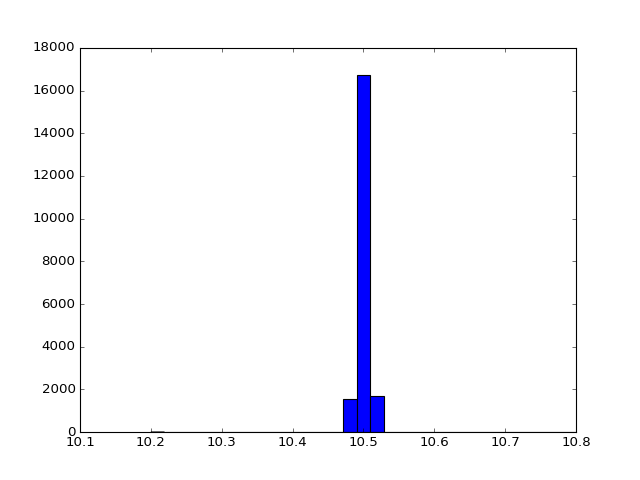

In [15]:
tau  = 1 / 0.01**2    #measurement precision ( 1 / SD^2 )
x    = pymc.Uniform("x", -20, 20)  #prior distribution for x
@pymc.deterministic
def observations_model(x=x):
    xM1 = x + sM1  #global position of Marker 1
    xM2 = x + sM2  #global position of Marker 2
    return [xM1, xM2]
qobs = pymc.Normal("qobs", observations_model, tau, value=[46,55], observed=True)

mcmc = pymc.MCMC([qobs, x])
mcmc.sample(40000, 20000)

pyplot.figure()
X = mcmc.trace('x')[:]
pyplot.hist(X, range=(10.2,10.8), bins=31);

Clearly our assumptions regarding $\tau$ have affected our posterior distribution.  In fact, it has become clear that **the least-squares solution is equivalent to the Bayesian solution under an assumption of infinite measurement precision**.  That is, as the presumed measurement precision increases the Bayesian solution converges to $x$=10.5, with no uncertainty, just like the least-squares solution.

This seems somewhat strange:  the least-squares solution has minimized measurement error, so how can that be equivalent to an assumption of no measurement error?  This apparent paradox is resolved by the opposite perspectives on measurements that the two approaches adopt.  The least-squares approach regards the measured data as hard, and minimizes an explicit function of those measurements.  Contrastingly, the Bayesian approach regards the measured data as soft -- just one manifestation of a continuum of plausible measurements.  Thus setting infinite precision forces the Bayesian approach to regard the data as hard, and consequently to assume zero variability in its estimate of $x$.

This raises an important point:  what actual value of precision should we use?  Most motion capture manufacturers provide measurement accuracy values, so one option is to use those precision data. A second, more Bayesian option, is to regard precision itself as stochastic, and to then let Bayesian inference decide the most likely precision, based on the data.  This can be implemented as follows:

 [-----------------100%-----------------] 40000 of 40000 complete in 4.4 sec

<IPython.core.display.Javascript object>


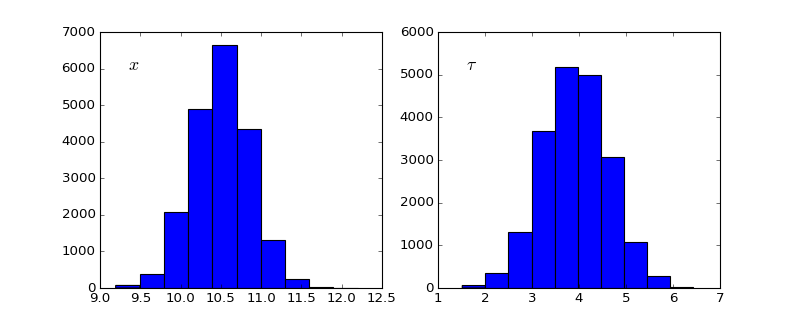

10.5060833183
3.92331098708


In [16]:
tau  = pymc.Normal("tau", 4, 2, value=4)  #prior distribution for tau
x    = pymc.Uniform("x", -20, 20)  #prior distribution for x

@pymc.deterministic
def observations_model(x=x):
    xM1 = x + sM1  #global position of Marker 1
    xM2 = x + sM2  #global position of Marker 2
    return [xM1, xM2]
qobs = pymc.Normal("qobs", observations_model, tau, value=np.array([46,55]), observed=True)

mcmc = pymc.MCMC([qobs, x, tau])   #now tau also appears in the collection of stochastic variables
mcmc.sample(40000, 20000)

pyplot.figure(figsize=(10,4))
X = mcmc.trace('x')[:]
TAU = mcmc.trace('tau')[:]
ax = pyplot.subplot(121);  ax.hist(X);   ax.text(0.1, 0.85, r'$x$', size=16, transform=ax.transAxes)
ax = pyplot.subplot(122);  ax.hist(TAU); ax.text(0.1, 0.85, r'$\tau$', size=16, transform=ax.transAxes)

print( X.mean() )
print( TAU.mean() )

Our new definition of "`tau`" implies that we are reasonably certain that the true measurement precision is 4, but it might also be slighlty larger or slightly smaller.  This flexibility permits Bayesian inference to simultaneous find the most likely range of values for both $x$ and $\tau$. The final results depicted above suggest that:

* The observed measurements tell us that the true value of $x$ is most likely very close to 10.5, but due to measurement errors we cannot be completely confident in this value.  The measurements tell us that the true value of $x$ almost certainly lies in the range [9.5, 11.5].

* The observed measurements suggest that our presumed precision model is probably fine, and that a value close to 4 is most likely the true precision value, but due to random measurement errors we cannot be certain. The true value of tau almost certainly lies in the range [2, 6].

### Summary

The mechanical slider model and marker measurements discussed in this Appendix, while rudimentary, highlight a variety of important differences between the least-squares and Bayesian approaches to inverse kinematics (IK).  While the least-sqaures approach minimizes an explicit function of the measured data, the Bayesian approach instead maximizes the maximim a posteriori probabilities (MAP) of all stochastic variables, using Bayes' Rule to map from the prior to the posterior distributions based on the observed data. Consequenty, the Bayesian approach propagates measurement uncertainty to the IK solution, but the least-squares solution does not.  Therefore, and somewhat paradoxically, the Bayesian and least-squares approaches yield equivalent IK solutions only under an assumption of infinite measurement precision. Last, results above show that BIK can be sensitive to modeling assumptions, including which variables are stochastic and the prior distributions of each stochastic variable.